In [750]:
#Importing...

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize



#Reading the .mat file

mat_contents = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex4\ex4\ex4data1.mat')

mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [751]:
#Taking matrix X and Y
X = mat_contents['X']
print(X)

Y = mat_contents['y']
print(Y)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [752]:
#initialising some values...

#m: no. of data sets
#n: no. of features
m,n = X.shape
print(m,n)

#taking the width
example_width = round(n**0.5)

print(example_width)

print()

5000 400
20



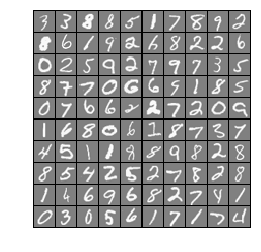

AxesImage(112.68,36;217.44x217.44)
[[-1. -1. -1. ... -1. -1. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 ...
 [-1.  0.  0. ...  0.  0. -1.]
 [-1.  0.  0. ...  0.  0. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [753]:
#VISUALIZING THE DATA

#taking random permutation of the data set
random = np.random.permutation(m)

#now taking the random 100 data sets
sel = X[random[0:100],:]


#displaying the data
def displayData(X,example_width):
    plt.close()
    plt.figure()
    plt.set_cmap('gray')#setting the color to gray
    
    m,n = X.shape
    
    #taking the height
    example_height = int(n/example_width)
    
    #no. of rows and columns
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols =int(math.ceil(m/display_rows))
    
    pad = 1
    
    display_array = -np.ones((pad + display_rows * (example_height + pad),pad + display_cols * (example_width + pad)))
    
    curr_ex = 1
    
    for i in range(1,display_rows+1):
        for j in range(1,display_cols+1):
            if curr_ex > m:
                break
            
            max_val = max(abs(X[curr_ex-1,:]))
            
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width + pad) + np.array(range(example_width))
            
            display_array[rows[0]:rows[-1]+1,cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :],(example_height, example_width),order = 'F') / max_val
            curr_ex += 1
        
        if curr_ex > m:
            break
    
    h = plt.imshow(display_array,vmin = -1,vmax = 1)
    
    plt.axis('off')
    plt.show(block = False)
    
    return h,display_array

a,b = displayData(sel,int(example_width))
print(a)
print(b)


In [754]:
#MODEL REPRESENTATION...

In [755]:
## Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)
    
Lambda = 1

In [756]:
#Taking matrix X
X = mat_contents['X']

m,n = X.shape
x0 = [1 for i in range(m)]
                                                                #yha hmne dubara X and Y bna dia becoz we have to add column of 1
X = np.concatenate((np.array(x0).reshape(m,1),X),axis = 1)
print(X.shape)


(5000, 401)


In [757]:
#it will convert the two thetas passed into a long vector
def unrollParam(Theta1,Theta2):
    
    return np.concatenate([ np.array(Theta1.ravel()),np.array(Theta2.ravel()) ])

#it will convert along vector passed i.e, nn_params into the two thetas of shape (hidden_layer_size,input_layer_size+1)
#and (num_labels,hidden_layer_size+1)
def retrieve_thetas_nnparams(nn_params,input_layer_size,hidden_layer_size,num_labels):
    theta1 = nn_params[:(input_layer_size+1)*hidden_layer_size].reshape((hidden_layer_size,input_layer_size+1))
    theta2 = nn_params[(input_layer_size+1)*hidden_layer_size:].reshape((num_labels,hidden_layer_size+1))
    return theta1,theta2

In [758]:
#loading the file having learned thetas
all_theta = sio.loadmat('E:\Machine Learning\Exercises\machine-learning-ex4\ex4\ex4weights.mat')
theta1 = all_theta['Theta1']

theta2 = all_theta['Theta2']

#unrolling these thetas into a long vector
nn_params = unrollParam(theta1,theta2)

print(nn_params.shape)

print(theta1.shape)
print(theta2.shape)


(10285,)
(25, 401)
(10, 26)


In [759]:
#FEEDFORWARD AND COST FUNCTION...

In [760]:
def sigmoid(z):
    
    #IF z IA AN ARRAY
    if isinstance(z,np.ndarray):
        temp = np.ones(z.shape)
       
        temp = 1/(1 + np.exp(-z))
        
        return temp
   
    #IF z IS A LIST
    elif isinstance(z,list):
        for i in range(len(z)):
            z[i] = 1/(1 + np.exp(-z[i]))
        return z
    
    #IF z IS A NO.   
    else:
        return 1/(1 + np.exp(-z))

In [761]:
#creating Y again
Ynew = np.zeros((m,num_labels))

for i in range(m):
       
    Ynew[i,Y[i]-1] = 1
    
print(Ynew.shape)
import random
for i in range(10):
    c = random.randint(1,5000)
    
    print(Ynew[c],'  ',Y[c])

(5000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]    [1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]    [10]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]    [2]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]    [8]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]    [1]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]    [6]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]    [5]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]    [8]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]    [9]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]    [2]


In [762]:
#Computing Cost(Feedforward)

# in these three lines, we bring last column of hypo to the first position
"""ss = hypo[:,0:9].reshape(5000,9)
aa = hypo[:,9].reshape(5000,1)

hypo = np.concatenate((aa,ss),axis = 1)"""



def nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,Ynew,Lambda,m):
    
    #retrieving the two thetas from the long vector nn_parmas
    theta1,theta2 = retrieve_thetas_nnparams(nn_params,input_layer_size,hidden_layer_size,num_labels)
    
    
    #Computing h(theta)
    a = sigmoid(X.dot(theta1.transpose()))#hidden layer
    #print(a.shape)
    a0 = np.ones((m,1))#hidden layer me 1 column add kia of ones
    
    a = np.concatenate((a0,a),axis = 1)
    
    hypo = sigmoid(a.dot(theta2.transpose()))

    #print(hypo.shape)

    
    #computing element wise multiplication of Ynew and log(hypo)
    term1 =np.multiply(Ynew,np.log(hypo))#np.multiply does element wise multiplication of the two matrices
    
    #computing element wise multiplication of (1 - Ynew) and log(1 - hypo)
    term2 = np.multiply(1-Ynew,np.log(1-hypo)) 
    
    #computing triple summation of (theta(ji) of all level)^2 multiplied by lambda/2m
    m1,n1 = theta1.shape
    m2,n2 = theta2.shape
    
    #0 column include nahi krna isliye
    theta1temp = theta1[:,1:n1]
    theta2temp = theta2[:,1:n2]
    
    #regularized term
    term3 = (Lambda/(2*m))*((theta1temp**2).sum() + (theta2temp**2).sum())
    
    #returning the cost function
    return ((-(term1.sum() + term2.sum()))/m + term3)

print(nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,Ynew,Lambda,m))

0.3837698590909236


In [763]:

#computing derivatie of sigmoid(z) = g(z) * (1 - g(z))
def SigmoidGradient(z):
    return ((z) * (1 - (z)))

print(SigmoidGradient(np.arange(9).reshape(3,3)))

[[  0   0  -2]
 [ -6 -12 -20]
 [-30 -42 -56]]


In [764]:
##RANDOM INITIALIZATION

In [765]:
epsilon_init = 0.12

#implementing a function to initialize the weights of the neural network
def randInitializeWeights(L_in, L_out):
    
    #randomly initializing the thetas b/w -epsilon & +epsilon
    W = np.random.rand(L_out,L_in+1) * 2 * epsilon_init - epsilon_init
    
    return W



#creating two initial thetas which are randomly initialized
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

#unrolling the two initial_Theta1 & initial_Theta2 into a long vector
initial_nn_params = unrollParam(initial_Theta1,initial_Theta2)

print(initial_nn_params.shape)
print(initial_Theta1.shape)
print(initial_Theta2.shape)

(10285,)
(25, 401)
(10, 26)


In [766]:
np.size(initial_Theta1)

10025

In [767]:
##IMPLEMENTING BACKPROPAGATION ALGROITHM...

def backpropagationAlgorithm(params,input_layer_size,hidden_layer_size,num_labels,X,Ynew,Lambda,m):
    
    #retrieving the two thetas from the long vector params
    initial_Theta1,initial_Theta2 = retrieve_thetas_nnparams(params,input_layer_size,hidden_layer_size,num_labels)     
    
    # computing a1, a2 & a3
    a1 = X

    a2 = sigmoid(X.dot(initial_Theta1.transpose()))#hidden layer

    a2 = np.concatenate((np.ones((m,1)),a2),axis = 1)#on adding a column of 1
   # print(a2.shape)
    a3 = sigmoid(a2.dot(initial_Theta2.transpose()))

    
    
    #computing delta3 and delta2("error terms")
    delta3 = a3 - Ynew 
                       
        
    #computing delta2 = (delta3.theta2)*(a2*(1-a2))
    delta2 = (delta3.dot(initial_Theta2))*(SigmoidGradient(a2))
    
    delta2 = np.delete(delta2,0,1)#deleting 1st column of delta2
    
    """print(delta2.shape)
    
    print(delta3.shape)"""

    
    #bigger deltas
    Delta2 = (delta3.transpose()).dot(a2)
    Delta1 = (delta2.transpose()).dot(a1)
    
    """print(Delta2.shape)
    print(Delta1.shape)"""
    
    #deleting 1st columns of thetas
    initial_Theta1 = np.delete(initial_Theta1,0,1)
    initial_Theta2 = np.delete(initial_Theta2,0,1)
    
    #insertin column of zeros at first place so as to make it compatible for addition with Delta1/m to produce D1
    initial_Theta1 = np.insert(initial_Theta1,0,0,1)
    initial_Theta2 = np.insert(initial_Theta2,0,0,1)
    
    #computing Accumulator
    D1 = Delta1/m + (Lambda/m)*initial_Theta1
    D2 = Delta2/m + (Lambda/m)*initial_Theta2
    
    """print(Delta1.shape)
    print(D1.shape)"""
    
    #returning with unrolling the D1 and D2
    return unrollParam(D1,D2)

#storing the gradients in theta_grade1 and theta_grade2 which are retrieved from a long vector obtained after calling the function
theta_grade1, theta_grade2 = retrieve_thetas_nnparams(backpropagationAlgorithm(initial_nn_params,input_layer_size,hidden_layer_size,num_labels,X,Ynew,Lambda,m),input_layer_size,hidden_layer_size,num_labels)


#print(theta_grade1.shape)
#print(theta_grade2.shape)

print(initial_Theta1.shape)
print(initial_Theta2.shape)

(25, 401)
(10, 26)


In [768]:
##NOW DOING GRADIEDNT CHECKING....
#In this we will create a small neural network in which no. of features is less and compute the gradients with backProp algo
#and with finite differences(numerical gradient) if they both are equal then our backProp algo is correct

In [769]:
#Variables for small neural network

#sbke piche Check likh dia so as to understand that this is for Checking(gradient checking)
input_layer_sizeCheck = 3;
hidden_layer_sizeCheck = 5;
num_labelsCheck = 3;
mCheck = 5;

#For initializing XCheck ,theta1Check and theta2Check
def debugInitializeWeights(fan_out, fan_in):
    W = np.zeros((fan_out,fan_in + 1))
    
    #sine function se initialize kr d
    W = (np.sin(np.arange(1,np.size(W)+1)).reshape(W.shape))/10
    
    return W

# We generate some 'random' test data ,created theta1Check and theta2Check for checking small neural network
Theta1Check = debugInitializeWeights(hidden_layer_sizeCheck, input_layer_sizeCheck)
Theta2Check = debugInitializeWeights(num_labelsCheck, hidden_layer_sizeCheck)

#unrolling the theta to be check into a long vector
nn_paramsCheck = unrollParam(Theta1Check,Theta2Check)

print(Theta1Check.shape)
print(Theta2Check.shape)
print(nn_paramsCheck.shape)

(5, 4)
(3, 6)
(38,)


In [770]:
#created XCheck matrix which is intialized using sine function
XCheck  = debugInitializeWeights(mCheck, input_layer_sizeCheck - 1)

#adding a bias unit(a column of 1)
XCheck = np.insert(XCheck,0,1,1)

#creating Ycheck using Modulous funciton(remainder)
YCheck  =1 + np.remainder(np.arange(1,mCheck+1), num_labelsCheck)#1 se lekr mCheck tk k array ko divide kra num_labelsCheck
                                                            # se jo remainder aya usme 1 add kia and the result is YCheck

YnewCheck = np.zeros((mCheck,num_labelsCheck))

for i in range(mCheck):
       
    YnewCheck[i,YCheck[i]-1] = 1


print(YCheck)

print(YnewCheck)
print(XCheck.shape)

[2 3 1 2 3]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
(5, 4)


In [771]:

#gradients obtained on test data which are retrieved from the long vector obtained from the backprop alog
D1Check, D2Check = retrieve_thetas_nnparams(backpropagationAlgorithm(nn_paramsCheck,input_layer_sizeCheck,hidden_layer_sizeCheck,num_labelsCheck,XCheck,YnewCheck,Lambda,mCheck),input_layer_sizeCheck,hidden_layer_sizeCheck,num_labelsCheck)


In [772]:
#Computing Numerical Gradient on theta1Check

numgrad = np.zeros(Theta1Check.shape)#it would be the numerical gradient after gradient check
perturb = np.zeros(Theta1Check.shape)#for add epsilon to it (element wise)

m1,n1 = numgrad.shape

e = 10**(-4);#epsilon

for i in range(m1):
    # Set perturbation vector
    for j in range(n1):
        perturb[i,j] = e;  #i,j pe epsilon dalega fir usko plus minus kr k J compute krenge
        
        minusParam = unrollParam(Theta1Check - perturb,Theta2Check)
        plusParam = unrollParam(Theta1Check + perturb,Theta2Check)
        
        loss1 = nnCostFunction(minusParam,input_layer_sizeCheck,hidden_layer_sizeCheck,num_labelsCheck,XCheck,YnewCheck,Lambda,mCheck)
        loss2 = nnCostFunction(plusParam,input_layer_sizeCheck,hidden_layer_sizeCheck,num_labelsCheck,XCheck,YnewCheck,Lambda,mCheck)
        
        # Compute Numerical Gradient
        numgrad[i,j] = (loss2 - loss1) / (2*e)   #computing (J(theta + epsilon) - J(theta - epsilon))/2*epsilon
        
        perturb =  np.zeros(Theta1Check.shape)   #ise dobara se zero kr dia
        

print(numgrad,"\n ")
print(D1Check)

[[ 0.01231622  0.01835978  0.00308386 -0.01502735]
 [ 0.00392471 -0.00539821  0.013362    0.01983725]
 [-0.00808459 -0.01084911 -0.02002159 -0.01078632]
 [-0.01266691  0.01965602  0.01276025 -0.00586723]
 [-0.00559343 -0.01521978  0.00275391  0.01819567]] 
 
[[ 0.01231622  0.01835978  0.00308386 -0.01502735]
 [ 0.00392471 -0.00539821  0.013362    0.01983725]
 [-0.00808459 -0.01084911 -0.02002159 -0.01078632]
 [-0.01266691  0.01965602  0.01276025 -0.00586723]
 [-0.00559343 -0.01521978  0.00275391  0.01819567]]


In [773]:
#Computing Numerical Gradient on theta1Check

numgrad2 = np.zeros(Theta2Check.shape)
perturb2 = np.zeros(Theta2Check.shape)

m2,n2 = numgrad2.shape

e = 10**(-4);
for i in range(m2):
    # Set perturbation vector
    for j in range(n2):
        perturb2[i,j] = e;
        
        minusparam = unrollParam(Theta1Check,Theta2Check - perturb2)
        plusparam = unrollParam(Theta1Check,Theta2Check + perturb2)
        
        loss1 = nnCostFunction(minusparam,input_layer_sizeCheck,hidden_layer_sizeCheck,num_labelsCheck,XCheck,YnewCheck,Lambda,mCheck)
        loss2 = nnCostFunction(plusparam,input_layer_sizeCheck,hidden_layer_sizeCheck,num_labelsCheck,XCheck,YnewCheck,Lambda,mCheck)
        # Compute Numerical Gradient
        numgrad2[i,j] = (loss2 - loss1) / (2*e);
        perturb2 =  np.zeros(Theta2Check.shape)

print(numgrad2,"\n ")
print(D2Check)

[[0.30934772 0.17925309 0.14985892 0.14313253 0.13843822 0.14164805]
 [0.108133   0.07595054 0.06019342 0.04385492 0.03530847 0.0410438 ]
 [0.10627037 0.07557325 0.06356257 0.04812245 0.03551277 0.03527321]] 
 
[[0.30934772 0.17925309 0.14985892 0.14313253 0.13843822 0.14164805]
 [0.108133   0.07595054 0.06019342 0.04385492 0.03530847 0.0410438 ]
 [0.10627037 0.07557325 0.06356257 0.04812245 0.03551277 0.03527321]]


In [774]:
#Now we will use the intial thetas which are converted in the long vector initial_nn_params for this parameter will
#find the learning parameters iterating to some costs which will minimize the nnCostFunction with help of backprop algo

import scipy
result = scipy.optimize.fmin_cg(nnCostFunction,x0=initial_nn_params,fprime=backpropagationAlgorithm,\
                args=(input_layer_size,hidden_layer_size,num_labels,X,Ynew,Lambda,m),maxiter=400,disp=True,full_output=True) 
print(result)

         Current function value: 0.317347
         Iterations: 400
         Function evaluations: 876
         Gradient evaluations: 876
(array([ 6.07637679e-01, -2.88484908e-07,  3.34374836e-07, ...,
       -2.25112395e+00, -2.02168681e+00, -1.20585857e+00]), 0.3173469909301909, 876, 876, 1)


In [775]:
print('param.shape       : ',initial_nn_params.shape)
print('input layer size  : ',input_layer_size)
print('hidden_layer_size : ',hidden_layer_size)
print('num_labels        : ',num_labels)
#print('param.shape : ',initial_nn_params.shape)25*401+ 10*26

param.shape       :  (10285,)
input layer size  :  400
hidden_layer_size :  25
num_labels        :  10


In [776]:
result[0].shape   #result[0] will have the required learned parameters

(10285,)

In [777]:
#Retrieving final thetas from the long vector of result[0]
Finaltheta1,Finaltheta2 = retrieve_thetas_nnparams(result[0],input_layer_size,hidden_layer_size,num_labels)

In [778]:
#Now we will compute the hypothesis from our learning parameters

def predict(theta1,theta2):
    a = sigmoid(X.dot(theta1.transpose()))#hidden layer
    print(a.shape)
    a0 = np.ones((m,1))#hidden layer me 1 column add kia of ones
    
    a = np.concatenate((a0,a),axis = 1)
    
    
    hypo = sigmoid(a.dot(theta2.transpose()))#it will be a (5000,10) matrix ,ith row its matrix will tell the probabilities of each no.
                                            # with the corresponding element eg. hypo[2999,5] btayga ki X matrix k 2999 data k 6(index+1) hone ki
                                            #probability kitne hai
    return hypo

#hypothesis obtained from our learned parameters (final thetas which are optimized using fmincg)
pred = predict(Finaltheta1,Finaltheta2)
for i in range(5000):
    print(pred[i].max())

(5000, 25)
0.99896415091965
0.9988589610454994
0.9760013027206869
0.9990217176202705
0.9994980895238312
0.9997785997214309
0.9980646428845515
0.8971725999921737
0.9931884325441923
0.9841437274460225
0.9921456104831115
0.999296475723797
0.9981756858794579
0.8524894596489991
0.9997412098049041
0.9135296188245863
0.9998015211583952
0.9987782274484884
0.9985165990741338
0.9959505332580212
0.9970879977907801
0.9934349174985002
0.9970337942327466
0.8214901755670342
0.9638041448937544
0.9995542740199908
0.7813827682848237
0.9499247804904528
0.8207355324334374
0.9976527141473763
0.881297964331652
0.996710310908168
0.9969414298663095
0.9931145376186429
0.9992975562099177
0.9738003131867035
0.9996599346961127
0.9998258534145341
0.9985738310735273
0.9996098711078001
0.99883160436789
0.9997877676128769
0.9918613126770413
0.9889625910028959
0.9986511925278848
0.9988401328708865
0.9994124464891015
0.9657119200876633
0.9975565345678332
0.9925554201022884
0.9995249375637822
0.9962635748015554
0.998393

0.9910767454079458
0.9668194949390717
0.9999648370066112
0.9993140583628536
0.7067261654611838
0.9998953201314625
0.8748297825260444
0.9905871349544202
0.9980329701002194
0.995736234233363
0.9994687916695136
0.9619925254368572
0.9600749714719996
0.9894304483099551
0.9903823974644335
0.9991013570611353
0.9940998571092077
0.989797318699628
0.9938748045705151
0.9798850923288756
0.9299090066188304
0.9946564718386269
0.8220318382005704
0.9978979102538164
0.7083296983397773
0.9611760442024605
0.4373538432490144
0.9995376677522645
0.9933108022294277
0.999921067656567
0.994924635944994
0.9926253001903239
0.9978016614595946
0.7734352663526263
0.9964011492141722
0.9999608385918398
0.9779057112997063
0.9974218734664893
0.9959682728770829
0.9983600460323507
0.9998846078562215
0.9996085713966572
0.9966320419072157
0.9918834854698334
0.8651402032944631
0.9968219174091099
0.9648859776652032
0.9992151137417286
0.9416996344084906
0.9961629021645659
0.4896905620353346
0.9968956260761833
0.99677748737749

0.9973092840857953
0.9999019943120394
0.9934194388595404
0.9961825392681063
0.9499687511165729
0.9998496028573355
0.984468298814366
0.987915173255461
0.9703687904121968
0.9135304647024247
0.9998034457051196
0.9930063561672059
0.971715202002647
0.9983438962028501
0.9966369619762611
0.5910129151582351
0.8706775906069825
0.9124950521401763
0.9988518635235454
0.6015717499452286
0.9961248071864582
0.9484938259197732
0.9408905304528484
0.9836425922121309
0.9920216658226987
0.9934666183563244
0.9961125787355392
0.904944584396425
0.9989240340023656
0.755062416213901
0.9977073015584791
0.930018499171443
0.906393637179427
0.8615402305234162
0.946605075323576
0.8798129269072248
0.9891339900883428
0.9960788711950261
0.5783206328667678
0.8221570729418886
0.9909117349547999
0.892763367268781
0.991298589893927
0.9998798403413869
0.9722463876729264
0.46084542924202176
0.9998679012528091
0.9984280711955057
0.9885070311076192
0.9897350007113956
0.9838407782250905
0.9974554297351939
0.9932817252180908
0.

0.9990149017724251
0.9967921980844463
0.9682227047002563
0.9994337266581825
0.1921402699250663
0.9958557583539718
0.902320944789331
0.9674564534086335
0.9251327353341212
0.6047917140103991
0.9995131293835409
0.999271284084302
0.9906616333224219
0.9965409058652376
0.9984174353720429
0.9904134709551222
0.9985458911882333
0.9991673164931453
0.9833984994432651
0.9941995533264072
0.9988279487434536
0.992294371790333
0.8981567893617973
0.996827313979559
0.9992065149554021
0.2866145714125315
0.9997667850929147
0.9991082800343997
0.9813977333632148
0.9948494381536954
0.9985783600037794
0.999474551306912
0.8603479632882516
0.5717159376453306
0.8942562194513056
0.9991854853476791
0.9055829023522273
0.9982863583631107
0.9997072855376206
0.37572884688873504
0.9967895820637497
0.9999361566066827
0.9998727755600406
0.999066953279219
0.937623272769252
0.9755071278216323
0.9952853027708376
0.999966046429988
0.9953762213019095
0.9491393656062942
0.9997469245246836
0.9031095539375686
0.9982890698164295


0.9995894265585128
0.9904671799633078
0.9934347548093262
0.9832182251714991
0.9981736246736911
0.7915935985420683
0.913192631975117
0.9782220981553462
0.9511752872535723
0.934110953359418
0.9183015300179692
0.9933940406248438
0.9910218929461426
0.9998606880990848
0.8592693706379498
0.9984819379905004
0.9893535753693112
0.9912680324193905
0.9973156822081978
0.6710599995824644
0.7546887238827646
0.9273606099455959
0.9988810455142273
0.9998055880743983
0.9436178091391242
0.9785727403764783
0.9961879230798588
0.9994531981153445
0.9907974109508926
0.9998367450956069
0.9880587681538363
0.9995225891063385
0.8106715533078491
0.9976464040389036
0.9813824763349366
0.9973244834578796
0.8743811159950988
0.9190252853702703
0.8680235810103956
0.8359992704817076
0.8009994997320862
0.9991503208729728
0.9906294216344137
0.833107764791203
0.9949459090782653
0.9984279554634234
0.9973681768870747
0.9971720190734563
0.9892778246085453
0.9341180271800371
0.9982420160541983
0.972613762136658
0.99933159183360

0.9923241828290442
0.9994459634659193
0.9996027842547501
0.9995431748429865
0.9506057079357171
0.9994523637064906
0.9965185755271573
0.9887535196493393
0.9991420143496036
0.9882861445737019
0.9989190742914157
0.9980745378623428
0.5734228605090023
0.5580480117845086
0.7545587282102049
0.9997309475987728
0.9951517665532199
0.9937593972917614
0.9989864236697781
0.9993893181082691
0.9940968649225234
0.9924904508391292
0.9974084844095579
0.9054239216024379
0.9938899575162912
0.9961176506899008
0.9990939783432544
0.959073809289128
0.9928718477858915
0.9062531839022345
0.997314435464996
0.9800327563691525
0.9572329423876998
0.9989131486153779
0.9961581447164476
0.9884235992280689
0.9935742103419516
0.999578718631085
0.9778978982968544
0.9993072373858048
0.9982693065059235
0.9908819565560256
0.9860156511241116
0.4843471009997494
0.9989622380375619
0.9973986865358124
0.9975269298417256
0.9993571413048767
0.9925258394036612
0.9994452736879254
0.9989010830973083
0.9975016384619417
0.7791797034196

0.2546694760297496
0.9896141123498046
0.9923980915924558
0.9971387040526096
0.43465750839505696
0.9989802600889524
0.9857779855315875
0.9357870567075328
0.5078976163979937
0.9734054413205073
0.9989425248830615
0.9989059312253662
0.9914431476910468
0.9960621719709436
0.9993680092530153
0.901988986501466
0.9973813909383008
0.996524646320101
0.9966162927758927
0.9895479045977015
0.9840390959646809
0.9973267029119861
0.9955159763621169
0.6333641736920554
0.9878645045999056
0.9556770236687205
0.46849797473534566
0.9794756592314565
0.998101975209993
0.9973286446166165
0.7477849536905237
0.9940398226057086
0.8236221031661033
0.998766872857081
0.9962057694585211
0.9953220750110299
0.9968924672802636
0.9980100906455556
0.9952659842434433
0.9928676344812282
0.994442084670213
0.5876059275889105
0.9917576277387171
0.9871352960953521
0.9276538551805318
0.9958110915774918
0.9568436722462973
0.9985998017714045
0.6316236089795544
0.9990568288924917
0.9988485105110467
0.996438747126452
0.98750262484381

0.8390464232039236
0.9998634767145318
0.9934983769341729
0.9943059530311713
0.9996327432528062
0.9953455539823857
0.9955855422648688
0.9998105777067794
0.6026779360079079
0.9605337362167957
0.9990322510069463
0.973717890690537
0.9989050844368254
0.9985951140255958
0.9971710332925198
0.9278860362614069
0.9836698875608112
0.7793002983438645
0.9995551745547575
0.9995799760852577
0.9999254574270299
0.9999339109653881
0.9843637361943061
0.6634320048609049
0.9994292440858598
0.9988616555266062
0.9996188670641764
0.9909230848927345
0.973084391633522
0.9957313672203133
0.9900968372165777
0.9989448514673468
0.9944155050579261
0.9996958543106703
0.6933717401522704
0.8547682410821876
0.9998242480225995
0.8424887894163262
0.9976026453788451
0.9989910653193996
0.9994334481690538
0.9958976999331046
0.9078712846834962
0.9975859635179753
0.9913877967249258
0.9795975490812013
0.9541217216593058
0.999527897507142
0.9821987301146597
0.9655194445492874
0.9793369265401395
0.9965403422859727
0.9970318567284

0.9886750991093117
0.9982994790902929
0.9946610126107469
0.9414091002746345
0.9935166130180958
0.9974696475360397
0.9970437312629314
0.9883253047431555
0.9095354943451057
0.9973856622177102
0.9939770187300284
0.9941480422452185
0.9994943941807766
0.4917291879749622
0.9383898151622446
0.9969250282229881
0.9975130693795218
0.9807198291089334
0.9926015323973912
0.9040406514778752
0.9991202300876074
0.9897843496660859
0.845206546092723
0.9965945322650359
0.9516756687857243
0.9920896970686621
0.9965949852239331
0.9524937346419561
0.9871592121911729
0.9327587555264022
0.9683484374932619
0.8772270192966402
0.9934579977238923
0.7796945716930175
0.9867474195740329
0.9476817960235969
0.993430262852876
0.9846984223338587
0.9991381845830477
0.9952168970538121
0.9978590201737397
0.9896122497113181
0.9759944115393512
0.9934991008193932
0.6038211349286408
0.9987503555476585
0.7451081551802146
0.9878874391777526
0.9126009404009671
0.6718910648174837
0.9981645175504749
0.9900405176899968
0.930881810297

In [779]:
#Calculating the total no. of correct prediction

count = 0

r,c = pred.shape
print(pred.shape)
for i in range(r):
    
    #ab hmare pas probabilties hai predict variable me hr row ka max element jha hai uska (index+1) no. signify krta hai us
    #row pe jonsa hoga
    if (np.argmax(pred[i])+1)==int(Y[i]):
        count+=1
print('correctly predicted: ',count,' From data size of :',r)

(5000, 10)
correctly predicted:  4980  From data size of : 5000


In [780]:
#Predicting the percentage accuracy

print("The percentage prediction is : ",count*100/r,' % ')

The percentage prediction is :  99.6  % 


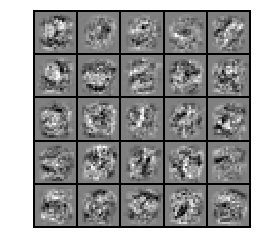

(<matplotlib.image.AxesImage at 0x1705ed99c88>,
 array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
        [-1.00000000e+00, -2.69509389e-07,  1.47075197e-08, ...,
         -1.54135176e-05,  3.21972207e-07, -1.00000000e+00],
        [-1.00000000e+00,  3.12380839e-07,  2.53342704e-06, ...,
          1.32606370e-04, -3.41719774e-06, -1.00000000e+00],
        ...,
        [-1.00000000e+00,  2.08654916e-07, -1.33725371e-04, ...,
          2.43297223e-04, -8.33464975e-07, -1.00000000e+00],
        [-1.00000000e+00,  3.44201140e-07,  1.01896571e-04, ...,
         -1.62202725e-07, -1.90468685e-08, -1.00000000e+00],
        [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00]]))

In [784]:
displayData(Finaltheta1[:,1:],example_width)
